# 02 Exercise FashionMNIST

In [1]:
# Import librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torchvision
import torchvision.transforms as transforms

# Scikit-learn per preprocessing e metriche
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Impostazioni
np.random.seed(42)
torch.manual_seed(42)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")
print(f"Device: {device}")
print(f"CUDA disponibile: {torch.cuda.is_available()}")

import os, urllib.request

# GitHub Release URL for pretrained weights
WEIGHTS_BASE_URL = os.environ.get('WEIGHTS_URL', 'https://github.com/SamueleBolotta/CEAR/releases/download/v1.0/')
WEIGHTS_DIR = '../pretrained_weights'
os.makedirs(WEIGHTS_DIR, exist_ok=True)

def load_or_train(model, train_fn, weights_filename, device='cpu'):
    """Load pretrained weights if available, otherwise train and save.
    Also saves/loads training history as JSON alongside weights."""
    weights_path = os.path.join(WEIGHTS_DIR, weights_filename)
    history_path = weights_path.replace('.pt', '_history.json')

    def _load_history():
        if os.path.exists(history_path):
            import json as _json
            with open(history_path, 'r') as f:
                return _json.load(f)
        return None

    if os.path.exists(weights_path):
        model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
        print(f"Loaded pretrained weights from {weights_path}")
        return _load_history()
    elif WEIGHTS_BASE_URL:
        try:
            url = WEIGHTS_BASE_URL + weights_filename
            urllib.request.urlretrieve(url, weights_path)
            # Also try downloading history
            try:
                urllib.request.urlretrieve(
                    WEIGHTS_BASE_URL + weights_filename.replace('.pt', '_history.json'), history_path)
            except Exception:
                pass
            model.load_state_dict(torch.load(weights_path, map_location=device, weights_only=True))
            print(f"Downloaded and loaded weights from {url}")
            return _load_history()
        except Exception as e:
            print(f"Could not download weights: {e}. Training from scratch...")

    history = train_fn()
    torch.save(model.state_dict(), weights_path)
    print(f"Saved weights to {weights_path}")
    if history is not None:
        import json as _json
        with open(history_path, 'w') as f:
            _json.dump(history, f)
        print(f"Saved training history to {history_path}")
    return history

PyTorch version: 2.10.0+cu128
Torchvision version: 0.25.0+cu128
Device: cuda
CUDA disponibile: True


## Esercizio 1

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 202kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.76MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 14.2MB/s]


Dataset Fashion MNIST
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)
Range valori originali: [0, 255]
Numero classi: 10


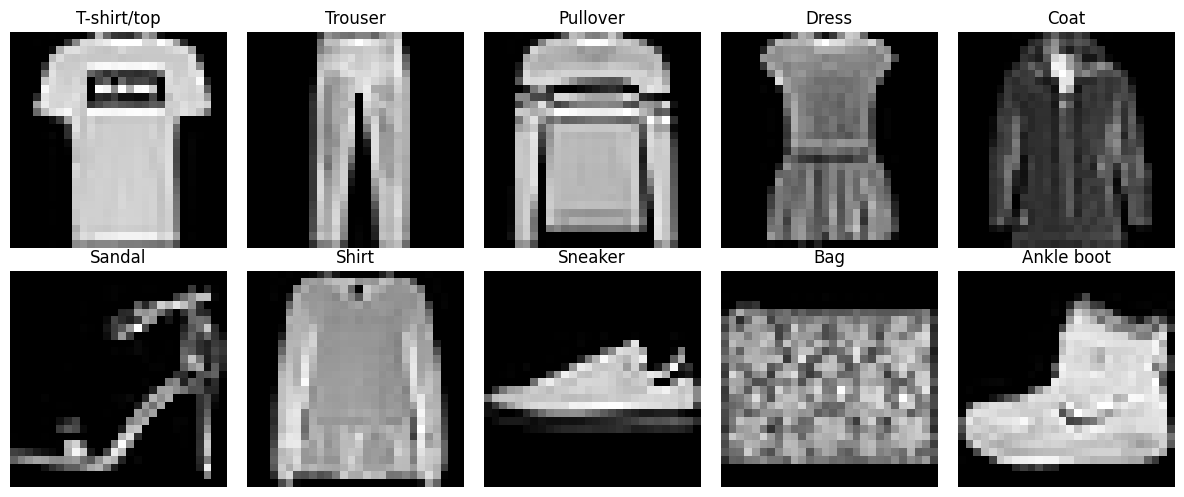


Dopo preprocessing:
Train shape: (60000, 784), range: [0.00, 1.00]
Test shape: (10000, 784)

Distribuzione classi:
   classe_id  nome_classe  conteggio  percentuale
0          0  T-shirt/top       6000         10.0
1          1      Trouser       6000         10.0
2          2     Pullover       6000         10.0
3          3        Dress       6000         10.0
4          4         Coat       6000         10.0
5          5       Sandal       6000         10.0
6          6        Shirt       6000         10.0
7          7      Sneaker       6000         10.0
8          8          Bag       6000         10.0
9          9   Ankle boot       6000         10.0

Statistiche pixel per classe:
 classe_id nome_classe  media_pixel  std_pixel  min_pixel  max_pixel
         0 T-shirt/top    83.029980  89.438480          0        255
         1     Trouser    56.840855  87.600263          0        255
         2    Pullover    96.058763  91.463466          0        255
         3       Dress    6

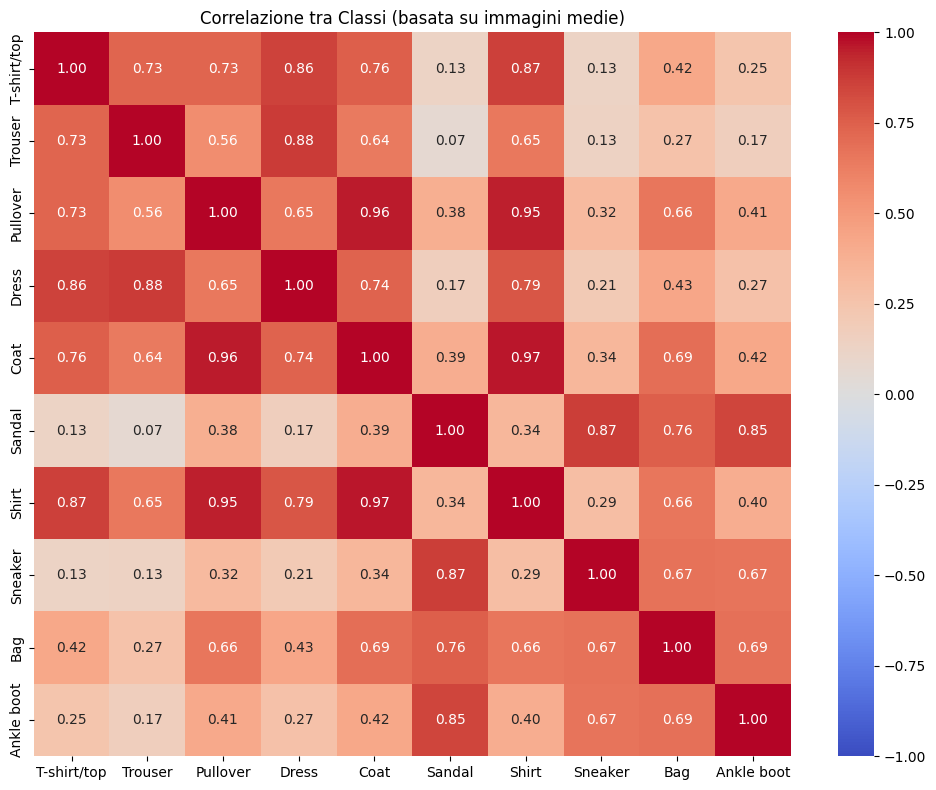

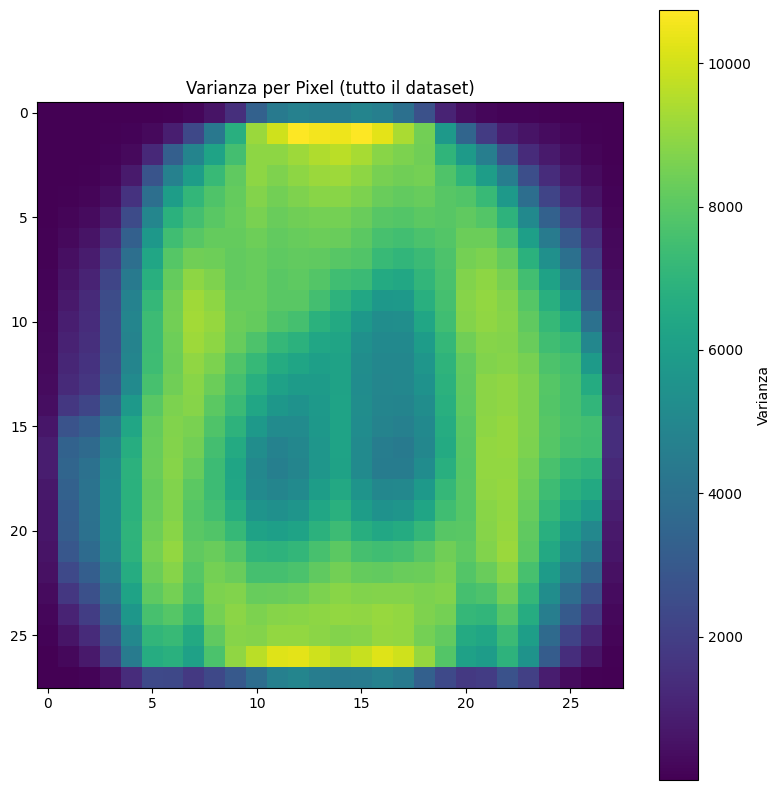


Pixel con varianza piu' alta: indice 43, valore 10744.10
Pixel con varianza piu' bassa: indice 0, valore 0.01

Esercizio 1 completato!


In [4]:
# ============================================================================
# ESERCIZIO 1: Preprocessing e Analisi Dataset Fashion MNIST
# ============================================================================
# Task: Caricare, preprocessare e analizzare Fashion MNIST
# Dataset: Fashion MNIST (70000 immagini 28x28, 10 classi di abbigliamento)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torchvision

# Caricamento dataset Fashion MNIST
np.random.seed(123)
fmnist_train = torchvision.datasets.FashionMNIST(root='../data', train=True, download=True)
fmnist_test = torchvision.datasets.FashionMNIST(root='../data', train=False, download=True)

X_train_fmnist = fmnist_train.data.numpy()
y_train_fmnist = fmnist_train.targets.numpy()
X_test_fmnist = fmnist_test.data.numpy()
y_test_fmnist = fmnist_test.targets.numpy()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Dataset Fashion MNIST")
print(f"Train shape: {X_train_fmnist.shape}")
print(f"Test shape: {X_test_fmnist.shape}")
print(f"Range valori originali: [{X_train_fmnist.min()}, {X_train_fmnist.max()}]")
print(f"Numero classi: {len(class_names)}")

# Visualizzazione esempi per classe
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    idx = np.where(y_train_fmnist == i)[0][0]
    ax.imshow(X_train_fmnist[idx], cmap='gray')
    ax.set_title(class_names[i])
    ax.axis('off')
plt.tight_layout()
plt.show()

# Scrivi la tua soluzione qui
raise NotImplementedError()